<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT24/blob/Widen00-Lab2/Lab2/Widen00_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 2: Iterative Methods**
**Joel Widén**

# **Abstract**

Short summary of the lab report. State the objectives, methods used, main results and conlusions.

#**About the code**


This is a report in the course DD2363 Methods in Scientific Computing. The author of this file is Joel Widén, joelwid@kth.se.

# **Set up environment**

This block is run to set up the environment.

In [1]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

#try:
#    from dolfin import *; from mshr import *
#except ImportError as e:
#    !apt-get install -y -qq software-properties-common
#    !add-apt-repository -y ppa:fenics-packages/fenics
#    !apt-get update -qq
#    !apt install -y --no-install-recommends fenics
#    from dolfin import *; from mshr import *

#import dolfin.common.plotting as fenicsplot

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

Numbered algorithms, equations and chapter references used in this report is from the DD2363 course book Methods in Computational Science by Johan Hoffman if not stated otherwise.

**Assignment 1:** Function: Jacobi iteration for Ax=b

* *Input:* matrix $A$, vector $b$
* *Output:* vector $x$
* *Test:* convergence of residual $|| Ax-b ||$, $|| x-y ||$ for manufactured/exact solution $y$

**Assignment 2:** Function: Gauss-Seidel iteration for $Ax=b$

* *Input:* matrix $A$, vector $b$
* *Output:* vector $x$
* *Test:* convergence of residual $|| Ax-b ||$, $|| x-y ||$ for manufactured/exact solution $y$

**Assignment 3:** Function: Newton's method for scalar nonlinear equation $f(x)=0$

* *Input:* scalar function $f(x)$
* *Output:* real number $x$
* *Test:* convergence of residual $|f(x)|$, $|x-y|$ for manufactured/exact solution $y$

# **Method**

Methods and code here

In [72]:
# Run this block to set up matrix for gauss seidel and jacobi iteration


n = 10
m = n
# Should be diagonally dominant
# Matrix is randomized with zeroes and ones
# The maximum non diagonal sum in each row is n * 1 - 1
max_non_diag = (n * 1) - 1
# This means we must add an identity matrix with at least n * 1 - 1
# on the diagonal according to example 7.6
A = np.random.randint(2, size=(m, n)) + max_non_diag * np.eye(n)
y = np.random.randint(3, size=n)
b = A.dot(y)

print("Input matrix = ", A)
print("Manufactured solution y = ", y)
print("b = ", b)

Input matrix =  [[ 9.  0.  1.  1.  1.  1.  0.  1.  0.  0.]
 [ 0.  9.  1.  0.  0.  1.  1.  1.  1.  1.]
 [ 0.  1.  9.  0.  0.  1.  1.  1.  0.  0.]
 [ 1.  1.  0.  9.  1.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  1.  9.  1.  1.  0.  1.  1.]
 [ 1.  1.  0.  0.  1. 10.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  1.  9.  0.  1.  0.]
 [ 0.  0.  1.  1.  1.  1.  0.  9.  0.  1.]
 [ 1.  0.  0.  1.  0.  1.  1.  0. 10.  0.]
 [ 0.  0.  0.  1.  1.  0.  1.  0.  0. 10.]]
Manufactured solution y =  [0 2 1 0 2 2 1 2 0 0]
b =  [ 7. 24. 16.  6. 21. 25. 14. 23.  3.  3.]


In [73]:
# Assignment 1
# Jacobi iteration for Ax = b
# Jacobi iteration is based on splitting the A = A_1 + A_2 where
# A_1 = D = diag(A) and A_2 = A - D
# Example 7.8 used from the book

def jacobi_iteration(A, b):
  m, n = np.shape(A)
  x = np.zeros(n)
  k = 20
  x_matrix = np.zeros((k, len(x)))
  r_vec = np.zeros(k)
  for iter in range(k):
    x_k = x
    for i in range(0, n):
      sum = 0
      for j in range(0, n):
        if j == i:
          sum = sum
        else:
          sum += A[i][j]*x_k[j]
      x[i] = 1/A[i][i] * (b[i] - sum)
    x_matrix[iter,:] = x
    r = np.linalg.norm(A.dot(x)-b)
    r_vec[iter] = r
  return(x, x_matrix, r_vec)

D = np.diag(np.diag(A))
D_inv = np.linalg.inv(D)
Mj = np.eye(n) - np.matmul(D_inv, A)
conv_criterion = np.linalg.norm(Mj)

print("M = ", Mj)
print("Convergence criterion = ", conv_criterion)

x, x_matrix, r = jacobi_iteration(A, b)

error_matrix = x_matrix - y
error_vec = np.zeros_like(r)
i = 0
for error in error_matrix:
  error_vec[i] = np.linalg.norm(error)
  i += 1

print("Error from manufactured solution y = ",error_vec)
print("Result x = ", x)
print("Result residuals r = ", r)

error_vec_jacobi = error_vec
residuals_jacobi = r

M =  [[ 0.          0.         -0.11111111 -0.11111111 -0.11111111 -0.11111111
   0.         -0.11111111  0.          0.        ]
 [ 0.          0.         -0.11111111  0.          0.         -0.11111111
  -0.11111111 -0.11111111 -0.11111111 -0.11111111]
 [ 0.         -0.11111111  0.          0.          0.         -0.11111111
  -0.11111111 -0.11111111  0.          0.        ]
 [-0.11111111 -0.11111111  0.          0.         -0.11111111  0.
   0.         -0.11111111  0.          0.        ]
 [-0.11111111  0.          0.         -0.11111111  0.         -0.11111111
  -0.11111111  0.         -0.11111111 -0.11111111]
 [-0.1        -0.1         0.          0.         -0.1         0.
  -0.1         0.          0.          0.        ]
 [ 0.          0.         -0.11111111  0.         -0.11111111 -0.11111111
   0.          0.         -0.11111111  0.        ]
 [ 0.          0.         -0.11111111 -0.11111111 -0.11111111 -0.11111111
   0.          0.          0.         -0.11111111]
 [-0.1     

In [74]:
# Assignment 2
# Based on splitting into A_1 = L and A_2 = A - L
# Example 7.9 used from the book

def gauss_seidel_iteration(A, b):
  m, n = np.shape(A)
  x = np.zeros(n)
  k = 20
  x_matrix = np.zeros((k, len(x)))
  r_vec = np.zeros(k)
  for iter in range(k):
    for i in range(0, n):
      sum_1 = 0
      sum_2 = 0
      for j in range(0, i):
        sum_1 += A[i][j]*x[j]
      for j in range(i+1, n):
        sum_2 += A[i][j]*x[j]
      x[i] = 1/A[i][i] * (b[i] - sum_1 - sum_2)
    x_matrix[iter,:] = x
    r = np.linalg.norm(A.dot(x)-b)
    r_vec[iter] = r
  return(x, x_matrix, r_vec)

L = np.tril(A)
L_inv = np.linalg.inv(L)
Mj = np.eye(n) - np.matmul(L_inv, A)
conv_criterion = np.linalg.norm(Mj)

print("M = ", Mj)
print("Convergence criterion = ", conv_criterion)

x, x_matrix, r_vec = gauss_seidel_iteration(A, b)

error_matrix = x_matrix - y
error_vec = np.zeros_like(r)
i = 0
for error in error_matrix:
  error_vec[i] = np.linalg.norm(error)
  i += 1

print("Error from manufactured solution y = ",error_vec)
print("Result x = ", x)
print("Result residuals r = ", r)

error_vec_gauss_seidel = error_vec
residuals_gauss_seidel = r


M =  [[ 0.00000000e+00  0.00000000e+00 -1.11111111e-01 -1.11111111e-01
  -1.11111111e-01 -1.11111111e-01  0.00000000e+00 -1.11111111e-01
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11111111e-01  0.00000000e+00
   0.00000000e+00 -1.11111111e-01 -1.11111111e-01 -1.11111111e-01
  -1.11111111e-01 -1.11111111e-01]
 [ 0.00000000e+00  0.00000000e+00  1.23456790e-02  0.00000000e+00
   0.00000000e+00 -9.87654321e-02 -9.87654321e-02 -9.87654321e-02
   1.23456790e-02  1.23456790e-02]
 [ 0.00000000e+00  0.00000000e+00  2.46913580e-02  1.23456790e-02
  -9.87654321e-02  2.46913580e-02  1.23456790e-02 -8.64197531e-02
   1.23456790e-02  1.23456790e-02]
 [ 0.00000000e+00  0.00000000e+00  9.60219479e-03  1.09739369e-02
   2.33196159e-02 -1.01508916e-01 -1.12482853e-01  2.19478738e-02
  -1.12482853e-01 -1.12482853e-01]
 [ 0.00000000e+00  0.00000000e+00  2.12620027e-02  1.00137174e-02
   8.77914952e-03  3.23731139e-02 -7.76406036e-02  2.00274348e-02
   2.23593964e-02  2.2359396

In [61]:
from re import X
#Assignment 3
#Newtons method
#Newtons method based on algorithm 8.2

def f(x):
  #Chosen solutions of polynomial
  roots = [2, -1]
  fx = 1
  #Generate polynomial
  for root in roots:
    fx = fx * (x - root)
  return fx

def derivative(f, x):
  h = 0.0001
  #Using central difference
  df = (f(x+h)-f(x-h))/(2*h)
  return df

def newtons_method_scalar(f, x0):
  x = x0
  TOL = 10**-8
  residuals = np.zeros(0)
  x_vec = np.zeros(0)
  while abs(f(x)) > TOL:
    df = derivative(f, x)
    x = x - f(x)/df
    print(x)
    print(abs(f(x)))
    print(x_vec)
    print(residuals)
    residuals = np.append(residuals, [abs(f(x))])
    x_vec = np.append(x_vec, [x])
  return(x, residuals, x_vec)


x0 = -0.5
x, residuals, x_vec = newtons_method_scalar(f, x0)


error_newton = x_vec - (-1)
error_vec = np.zeros_like(error_newton)
i = 0
for error in error_newton:
  error_vec[i] = abs(error)
  i += 1

print("Solution x = ", x)
print("Error convergence = ", error_vec)
print("Residuals = ", residuals)

errors_newton = error_vec
residuals_newton = residuals


-1.124999999999722
0.3906249999990965
[]
[]
-1.0048076923076483
0.014446190828269997
[-1.125]
[0.390625]
-1.0000076800196602
2.304011796338538e-05
[-1.125      -1.00480769]
[0.390625   0.01444619]
-1.0000000000196607
5.898215249583246e-11
[-1.125      -1.00480769 -1.00000768]
[3.90625000e-01 1.44461908e-02 2.30401180e-05]
Solution x =  -1.0000000000196607
Error convergence =  [1.25000000e-01 4.80769231e-03 7.68001966e-06 1.96607175e-11]
Residuals =  [3.90625000e-01 1.44461908e-02 2.30401180e-05 5.89821525e-11]


# **Results**

<Figure size 640x480 with 0 Axes>

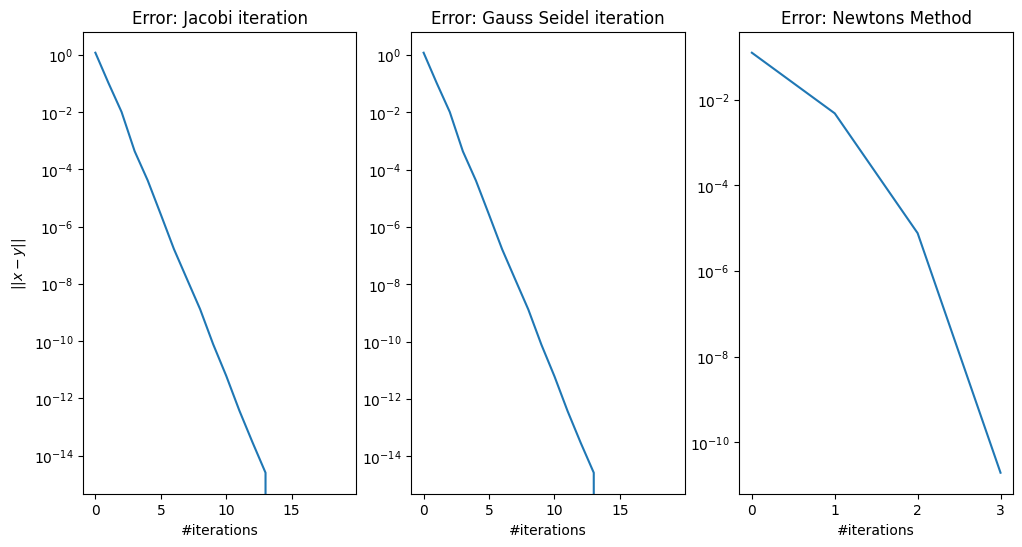

<Figure size 640x480 with 0 Axes>

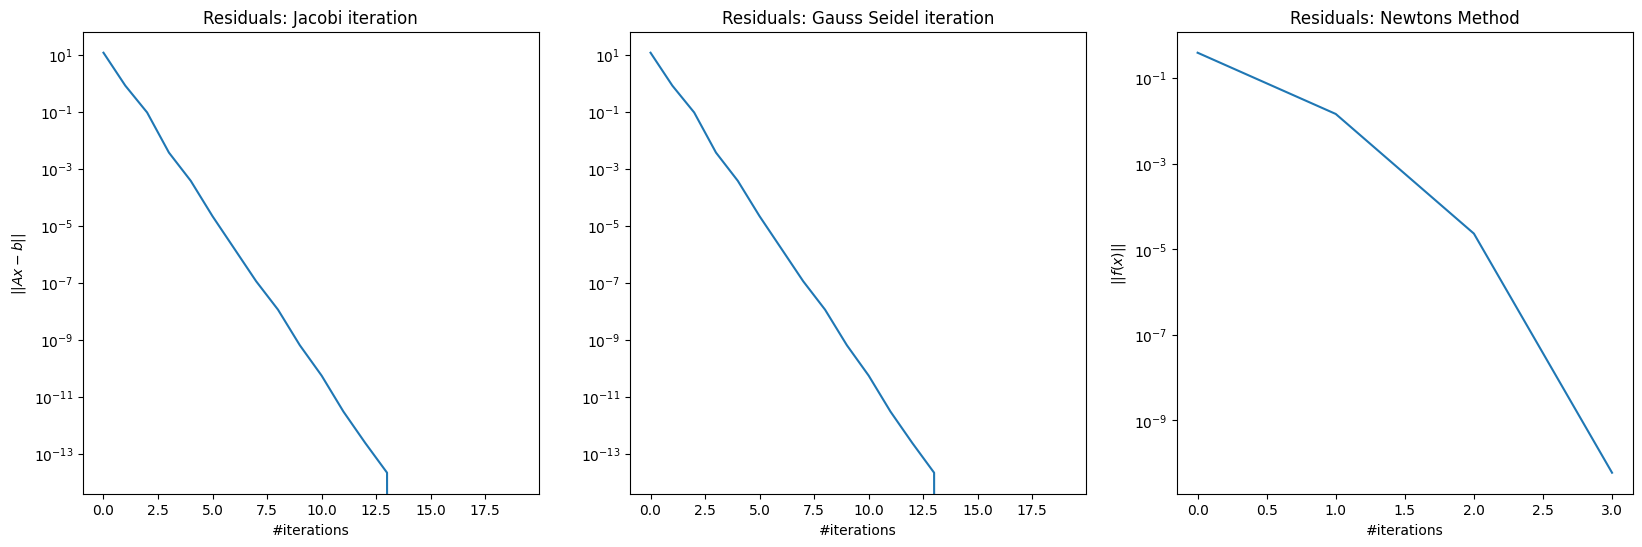

In [85]:
# Plot results

# Error plots
plt.figure(1)
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.semilogy(error_vec_jacobi)
plt.title("Error: Jacobi iteration")
plt.ylabel("$||x-y||$")
plt.xlabel("#iterations")
plt.subplot(132)
plt.semilogy(error_vec_gauss_seidel)
plt.title("Error: Gauss Seidel iteration")
plt.xlabel("#iterations")
plt.subplot(133)
plt.semilogy(errors_newton)
plt.title("Error: Newtons Method")
plt.xlabel("#iterations")
plt.show()

# Residual plots
plt.figure(2)
plt.tight_layout()
plt.figure(figsize=(20, 6))
plt.subplot(131)
plt.semilogy(residuals_jacobi)
plt.title("Residuals: Jacobi iteration")
plt.ylabel("$||Ax-b||$")
plt.xlabel("#iterations")
plt.subplot(132)
plt.semilogy(residuals_gauss_seidel)
plt.title("Residuals: Gauss Seidel iteration")
plt.xlabel("#iterations")
plt.subplot(133)
plt.semilogy(residuals_newton)
plt.title("Residuals: Newtons Method")
plt.ylabel("$||f(x)||$")
plt.xlabel("#iterations")
plt.show()

Results here

# **Discussion**

Discussion here